In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import cumtrapz
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import pandas as pd

In [79]:
def calculate_error(actual, actual_time, predicted, predicted_time):
    actual_index = 0;
    error = 0
    for i in range(len(predicted)):
        if i == 0:
            continue
        if actual_index == len(actual):
            break
        if predicted[i] > actual[actual_index]: 
            slope = (predicted[i] - predicted[i-1]) / (predicted_time[i] - predicted_time[i-1])
            intercept = predicted[i] - slope * predicted_time[i]
            predicted_value = slope * actual_time[actual_index] + intercept
            error += abs(predicted_value - actual[actual_index])
            actual_index += 1
    return error

def calculate_curve(k, n):
    # Define the differential equation function
    def differential_equation(v, t, k, n):
        dvdt = 9.8 - k * v**n
        return dvdt

    # Define the initial condition and time points
    v0 = 0  # Initial condition
    t = np.linspace(0, 1.5, 100)  # Time points

    # Define constants

    # Solve the differential equation
    v = odeint(differential_equation, v0, t, args=(k, n))

    x0 = 0
    v = v.ravel()
    x = cumtrapz(v, t, initial=x0)

    # Plot the integral of x
    # plt.plot(t, x)
    # plt.plot(t_data, x_data, 'o')
    # plt.xlabel('Time (t)')
    # plt.ylabel('Position')
    # plt.title('Position vs Time')
    # plt.grid()
    # plt.show()
    return x, t

def calculate_r2(actual, actual_time, predicted, predicted_time):
    actual_index = 0;
    predicted_values = []
    for i in range(len(predicted)):
        if i == 0:
            continue
        if actual_index == len(actual):
            break
        if predicted[i] > actual[actual_index]: 
            slope = (predicted[i] - predicted[i-1]) / (predicted_time[i] - predicted_time[i-1])
            intercept = predicted[i] - slope * predicted_time[i]
            predicted_value = slope * actual_time[actual_index] + intercept
            predicted_values.append(predicted_value)
            actual_index += 1

    mean_y = np.mean(actual)
    sst = np.sum((actual - mean_y) ** 2)
    ssr = np.sum((actual - predicted_values) ** 2)
    r_squared = 1 - (ssr / sst)
    return r_squared


In [140]:
def best_fit(filename):
    data = pd.read_csv(filename)
    t_data = data["Time (s)"]
    x_data = data["Position (m)"]
    t_data = t_data - t_data[0]
    x_data = x_data - x_data[0]

    min = 100000000
    best_k = 0
    best_n = 0
    for n in np.arange(0.5, 6, 0.1):
        for k in np.arange(0, 12, 0.1):
            x, t = calculate_curve(k, n)
            error = calculate_error(x_data, t_data, x, t)
            if error < min:
                min = error
                best_k = k
                best_n = n
            # print(n, k, error)

    if best_n < 0.5:
        lower_n = 0.3
        upper_n = best_n + 0.2
    elif best_n > 5.8:
        lower_n = best_n - 0.2
        upper_n = 6
    else:
        lower_n = best_n - 0.2
        upper_n = best_n + 0.2

    if best_k < 0.2:
        lower_k = 0
        upper_k = best_k + 0.2
    elif best_k > 11.8:
        lower_k = best_k - 0.2
        upper_k = 12
    else:
        lower_k = best_k - 0.2
        upper_k = best_k + 0.2

    for n in np.arange(lower_n, upper_n, 0.01):
        for k in np.arange(lower_k, upper_k, 0.01):
            x, t = calculate_curve(k, n)
            error = calculate_error(x_data, t_data, x, t)
            if error < min:
                min = error
                best_k = k
                best_n = n
            # print(n, k, error)
    

    x, t = calculate_curve(best_k, best_n)
    r2 = calculate_r2(x_data, t_data, x, t)
    print(filename[-11:-4] + " Best(n, k, r2): ", round(best_n, 2), round(best_k, 2), r2)
    x, t = calculate_curve(best_k, best_n)
    plt.plot(t, x)
    plt.plot(t_data, x_data, 'o')
    plt.xlim(0, 0.8)
    plt.ylim(0, 0.8)
    plt.xlabel('Time (s)')
    plt.ylabel('Position (m)')
    plt.title('Position vs Time')
    plt.grid()
    plt.show()

Trial 1 Best(n, k, r2):  0.7 7.8 0.9997770087922537


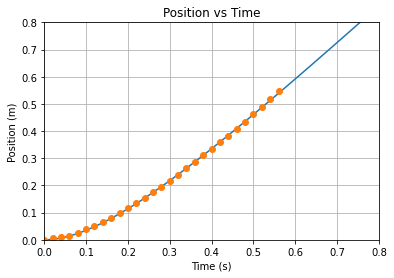

Trial 2 Best(n, k, r2):  0.62 9.14 0.9989079767103287


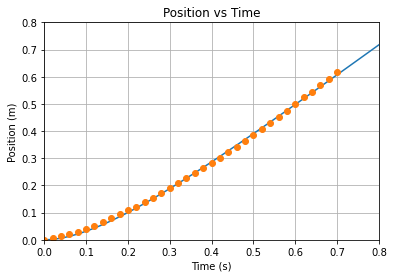

Trial 3 Best(n, k, r2):  1.95 3.79 0.9983121763408446


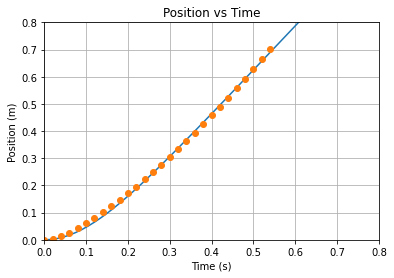

Trial 4 Best(n, k, r2):  1.98 3.34 0.9986093333945893


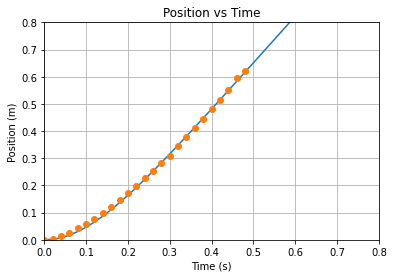

Trial 5 Best(n, k, r2):  1.92 2.3 0.9987988875841463


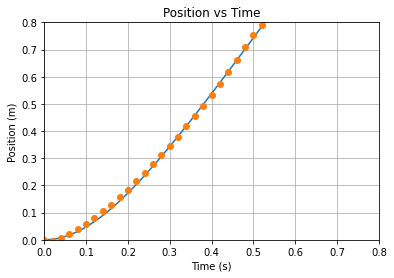

Trial 6 Best(n, k, r2):  2.42 1.37 0.9991641540522999


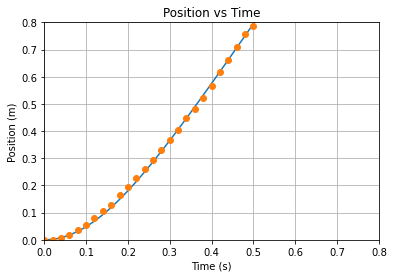

Trial 7 Best(n, k, r2):  5.49 0.09 0.9890087539914476


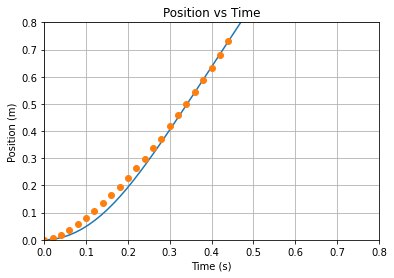

Trial 8 Best(n, k, r2):  0.46 10.21 0.9990581648931387


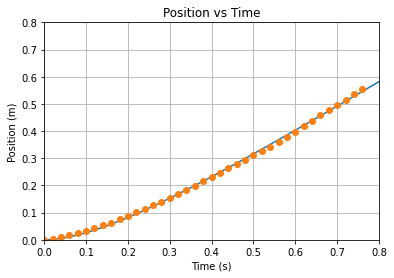

Trial 9 Best(n, k, r2):  2.04 6.51 0.9966350773202137


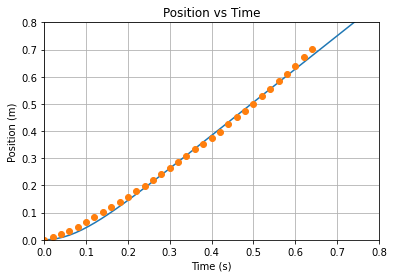

rial 10 Best(n, k, r2):  5.87 0.75 0.9957382493853658


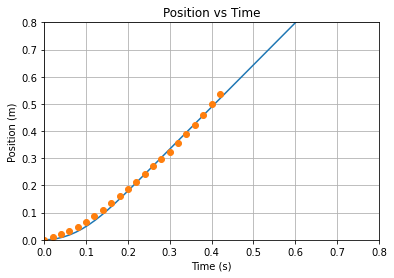

In [142]:
for i in range(1, 11):
    best_fit("Lab 3 Data - Trial " + str(i) + ".csv")